In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
file=files.upload()
PYDEVD_DISABLE_FILE_VALIDATION=1

Saving Delhi_v2.csv to Delhi_v2.csv


The Dataset is borrowed from kaggle (link: https://www.kaggle.com/datasets/goelyash/housing-price-dataset-of-delhiindia/data)


Our Goal is to predict the house price of delhi using Random Forest regression.

## **1st step-> Identify the Target Variable.**

In [ ]:
df=pd.read_csv('Delhi_v2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


There 7738 unique rows and and 18 columns.

In [ ]:
df.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [ ]:
df.nunique()

,0
Unnamed: 0,7738
price,584
Address,4145
area,1102
latitude,2942
longitude,2912
Bedrooms,9
Bathrooms,9
Balcony,10
Status,2


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7733,False
7734,False
7735,False
7736,False


In [ ]:
df.head(10)

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
5,5,3700000.0,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150.0,28.628040,77.437809,2.0,2.0,3.0,Ready to Move,New Property,NaN,NaN,NaN,NaN,Flat,\n,3217.391304
6,6,3270000.0,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",890.0,28.610645,77.455837,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,2.0,"within 10km Ryan,Sarvottam School, yathartha...",Flat,\n\n\n A northE...,3674.157303
7,7,3990000.0,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",850.0,28.471233,76.969597,2.0,2.0,1.0,Ready to Move,Resale,1.0,NaN,NaN,Suncity Avenue 102,Flat,\n \n \n...,4694.117647
8,8,3500000.0,"Sector 2, Greater Noida, Sector 2, Greater Noi...",960.0,28.581431,77.452819,2.0,2.0,2.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n,3645.833333
9,9,5500000.0,"Gaur City 5th Avenue, Noida Extension, Noida, ...",1400.0,28.614181,77.427713,3.0,3.0,4.0,Ready to Move,Resale,1.0,NaN,2.0,"Gaur City Mall, Near Gaur Stadium, City Plaza ...",Flat,\n\n\n 3 BHK Se...,3928.571429


Here , as the name suggests, we will be predicting house price so are target variable is price column.

## **2nd step-> EDA and data cleaning.**

Lets start with lift,as we know number, no of lift doesnt matter so lifts >=1 will be counted as 1 only and null data here can be counted as mode.

In [ ]:
df['Lift'] = df['Lift'].apply(lambda x: 1 if x >= 1 else x)
mode_lift = df['Lift'].mode()[0]
df['Lift'].fillna(mode_lift, inplace=True)
display(df['Lift'].value_counts())

/tmp/ipython-input-1052847750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lift'].fillna(mode_lift, inplace=True)


,count
Lift,
1.0,7469
0.0,269


Since we are using regression for price predictions we can drop sr.no , desccription column

In [ ]:
df = df.drop(['Unnamed: 0', 'desc'], axis=1)

Target/mean encoding: replace each address with the mean sale price for that address computed with out-of-fold smoothing to prevent leakage; this yields a single informative numeric feature and scales well with 3318 categories.

In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
from sklearn.model_selection import KFold

encoder = ce.TargetEncoder(cols=['Address'])

# Split data for out-of-fold smoothing
kf = KFold(n_splits=5, shuffle=True, random_state=42)
encoded_address = np.zeros(df.shape[0])

for train_index, val_index in kf.split(df):
    X_train, X_val = df.iloc[train_index], df.iloc[val_index]
    encoder.fit(X_train['Address'], X_train['price'])
    encoded_address[val_index] = encoder.transform(X_val['Address']).values.flatten()

df['Address_Encoded'] = encoded_address

# Drop the original Address column
df = df.drop('Address', axis=1)

display(df.head())

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,Price_sqft,Address_Encoded
0,5600000.0,1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,1.0,NaN,Flat,4148.148148,4.953389e+06
1,8800000.0,1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,1.0,NaN,Flat,5906.040268,9.231643e+06
2,16500000.0,2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,1.0,NaN,Flat,6918.238994,8.438837e+06
3,3810000.0,1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,1.0,near Gaur Mulberry Mansion,Flat,3628.571429,8.288299e+06
4,6200000.0,1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,1.0,NaN,Flat,4592.592593,8.288299e+06


Applied out-of-fold target encoding to the high-cardinality Address feature for house price regression. Using 5-fold cross-fitting, each fold’s validation rows received encodings learned only from the remaining training folds, preventing target leakage. The encoder replaces each address with a smoothed mean of price, blending the address-specific mean with the global mean to regularize rare categories; a default prior handles unseen addresses. The encoded values were stored in Address_Encoded, and the original Address column was dropped to avoid high-dimensional one-hot expansion.

Since Landmark column is sparse and might not perform well or could affect model in worst way. We can drop it.

In [ ]:
df = df.drop('Landmarks', axis=1)

In [ ]:
df.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,Address_Encoded
0,5600000.0,1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,1.0,Flat,4148.148148,4.953389e+06
1,8800000.0,1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,1.0,Flat,5906.040268,9.231643e+06
2,16500000.0,2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,1.0,Flat,6918.238994,8.438837e+06
3,3810000.0,1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,1.0,Flat,3628.571429,8.288299e+06
4,6200000.0,1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,1.0,Flat,4592.592593,8.288299e+06


For handling values in status column we can apply mode.

In [ ]:
mode_status = df['Status'].mode()[0]
df['Status'].fillna(mode_status, inplace=True)
display(df['Status'].value_counts())

/tmp/ipython-input-1374350120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Status'].fillna(mode_status, inplace=True)


,count
Status,
Ready to Move,7722
Under Construction,16


There will be too much bias so we simply drop the column

In [ ]:
df=df.drop('Status',axis=1)

lets take a look at neworold column.

In [ ]:
display(df['neworold'].value_counts())

,count
neworold,
Resale,6905
New Property,833


In [ ]:
display(df['Balcony'].value_counts())

,count
Balcony,
2.0,1793
3.0,1516
1.0,1082
4.0,613
5.0,130
6.0,21
7.0,4
10.0,3
8.0,3


In [ ]:
mode_balcony = df['Balcony'].mode()[0]
df['Balcony'].fillna(mode_balcony, inplace=True)
display(df['Balcony'].value_counts())

/tmp/ipython-input-2613347689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Balcony'].fillna(mode_balcony, inplace=True)


,count
Balcony,
2.0,4365
3.0,1516
1.0,1082
4.0,613
5.0,130
6.0,21
7.0,4
10.0,3
8.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   latitude          7738 non-null   float64
 3   longitude         7738 non-null   float64
 4   Bedrooms          7738 non-null   float64
 5   Bathrooms         7738 non-null   float64
 6   Balcony           7738 non-null   float64
 7   neworold          7738 non-null   object 
 8   parking           2612 non-null   float64
 9   Furnished_status  4124 non-null   object 
 10  Lift              7738 non-null   float64
 11  type_of_building  7738 non-null   object 
 12  Price_sqft        7738 non-null   float64
 13  Address_Encoded   7738 non-null   float64
dtypes: float64(11), object(3)
memory usage: 846.5+ KB


Parking data was inconsistentand is dropped for now

In [ ]:
df=df.drop('parking',axis=1)

In [ ]:
display(df['Furnished_status'].value_counts())

,count
Furnished_status,
Semi-Furnished,2199
Unfurnished,1230
Furnished,695


NAN is filled with no data

In [ ]:
df['Furnished_status'].fillna('no data', inplace=True)
display(df['Furnished_status'].value_counts())

/tmp/ipython-input-39820795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furnished_status'].fillna('no data', inplace=True)


,count
Furnished_status,
no data,3614
Semi-Furnished,2199
Unfurnished,1230
Furnished,695


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   latitude          7738 non-null   float64
 3   longitude         7738 non-null   float64
 4   Bedrooms          7738 non-null   float64
 5   Bathrooms         7738 non-null   float64
 6   Balcony           7738 non-null   float64
 7   neworold          7738 non-null   object 
 8   Furnished_status  7738 non-null   object 
 9   Lift              7738 non-null   float64
 10  type_of_building  7738 non-null   object 
 11  Price_sqft        7738 non-null   float64
 12  Address_Encoded   7738 non-null   float64
dtypes: float64(10), object(3)
memory usage: 786.0+ KB


Now to Deal with outliers in the data set

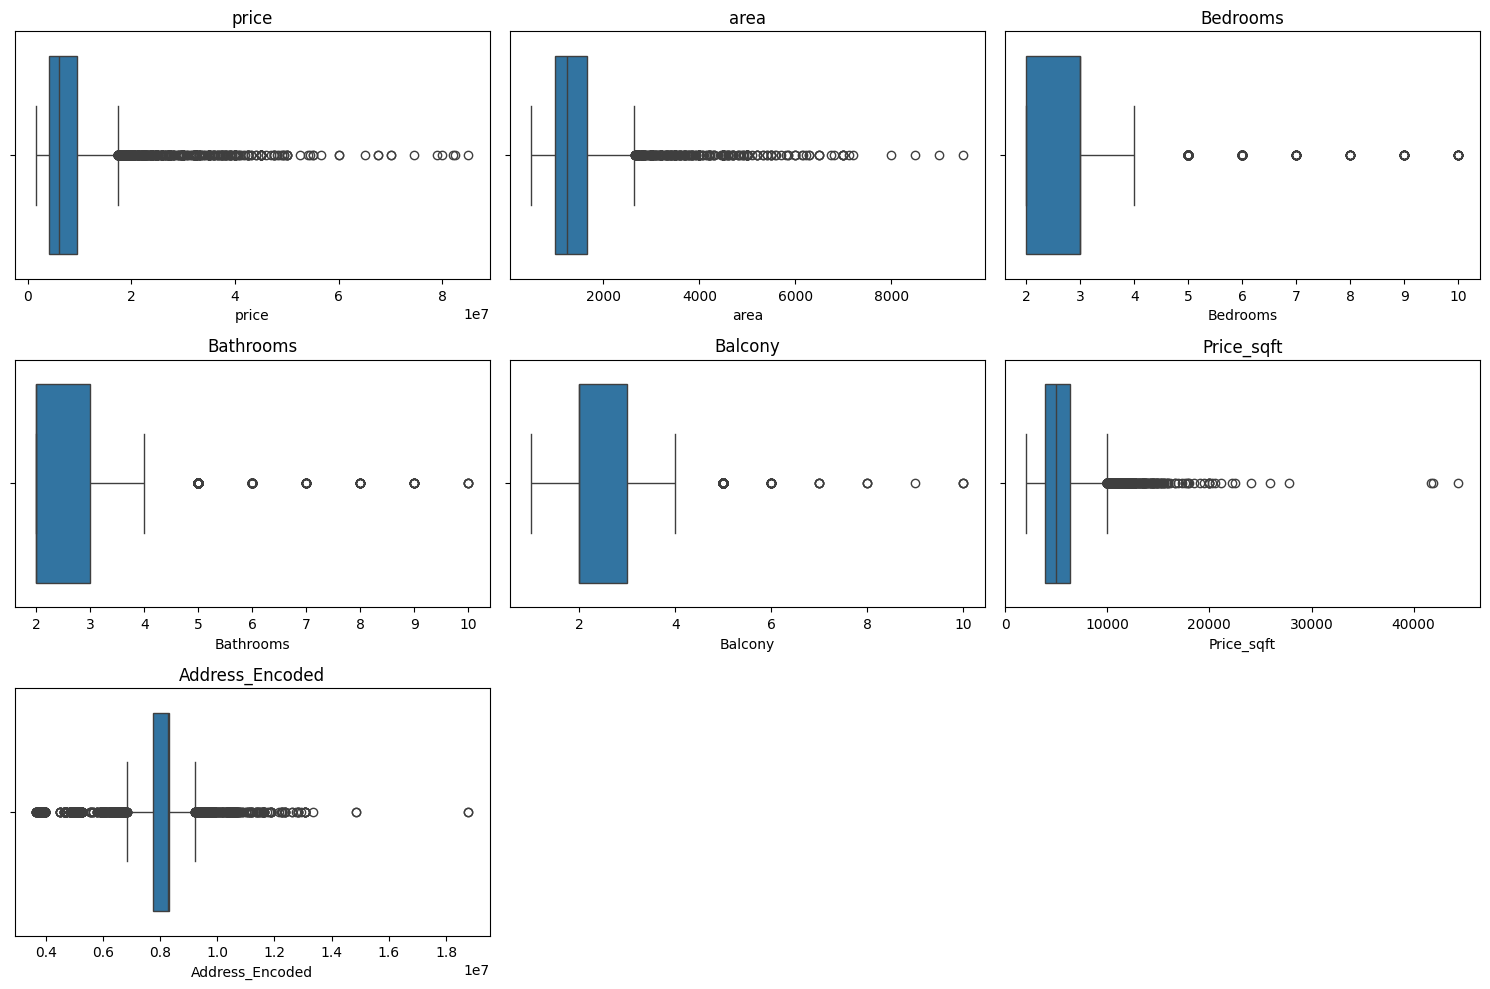

In [ ]:
numerical_cols = ['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony', 'Price_sqft','Address_Encoded']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

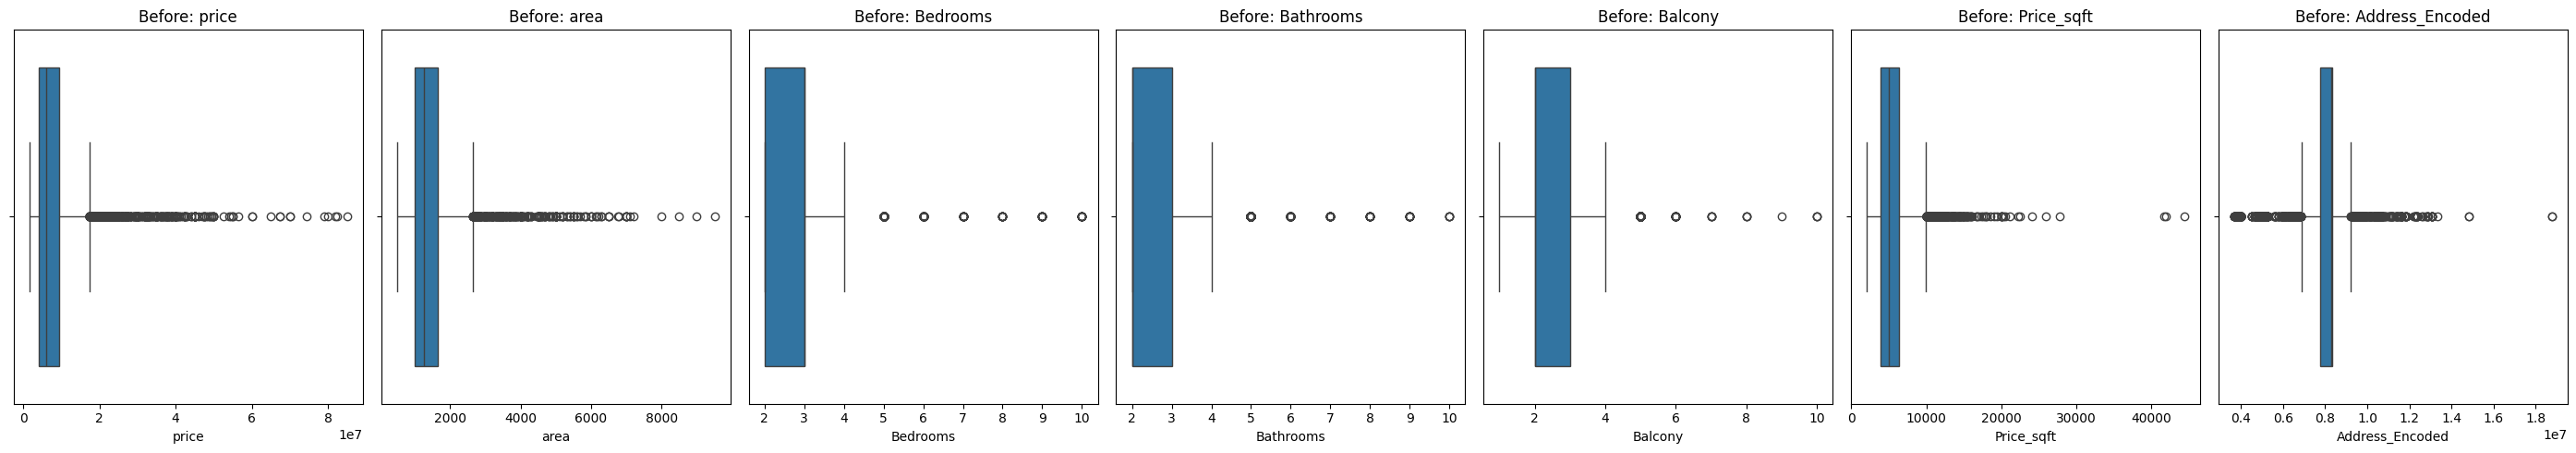

Before: (7738, 13)
After: (5514, 13)


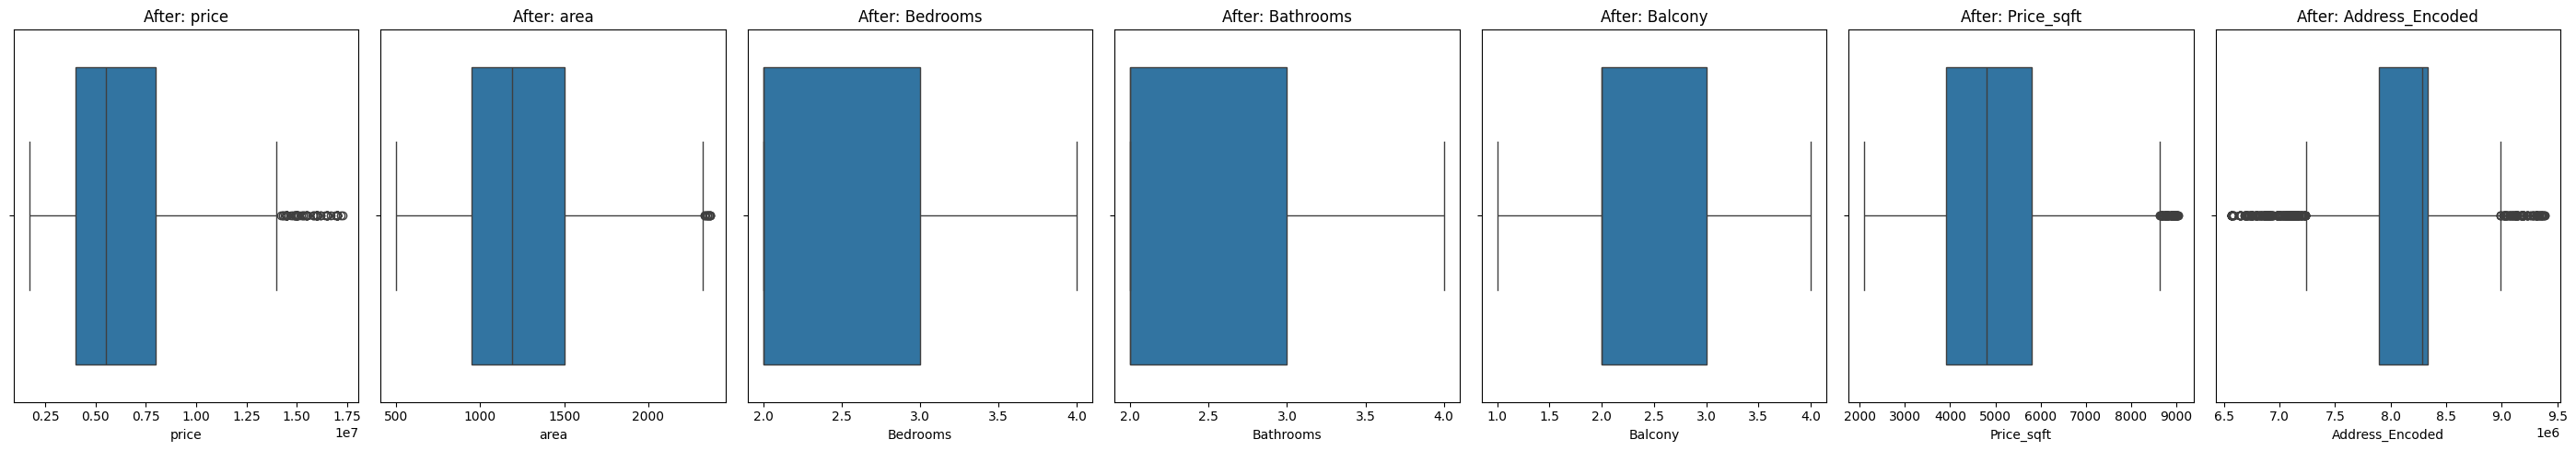

In [ ]:

num_cols = ['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony', 'Price_sqft', 'Address_Encoded']
num_cols = [c for c in num_cols if c in df.columns]

plt.figure(figsize=(4 * len(num_cols), 5))
for i, c in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(x=df[c])
    plt.title(f"Before: {c}")
plt.tight_layout()
plt.show()

def remove_outliers_iqr(df, cols):
    d = df.copy()
    for c in cols:
        Q1, Q3 = d[c].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        d = d[(d[c] >= low) & (d[c] <= high)]
    return d

print("Before:", df.shape)
df_cleaned = remove_outliers_iqr(df, num_cols)
print("After:", df_cleaned.shape)

plt.figure(figsize=(4 * len(num_cols), 5))
for i, c in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(x=df_cleaned[c])
    plt.title(f"After: {c}")
plt.tight_layout()
plt.show()

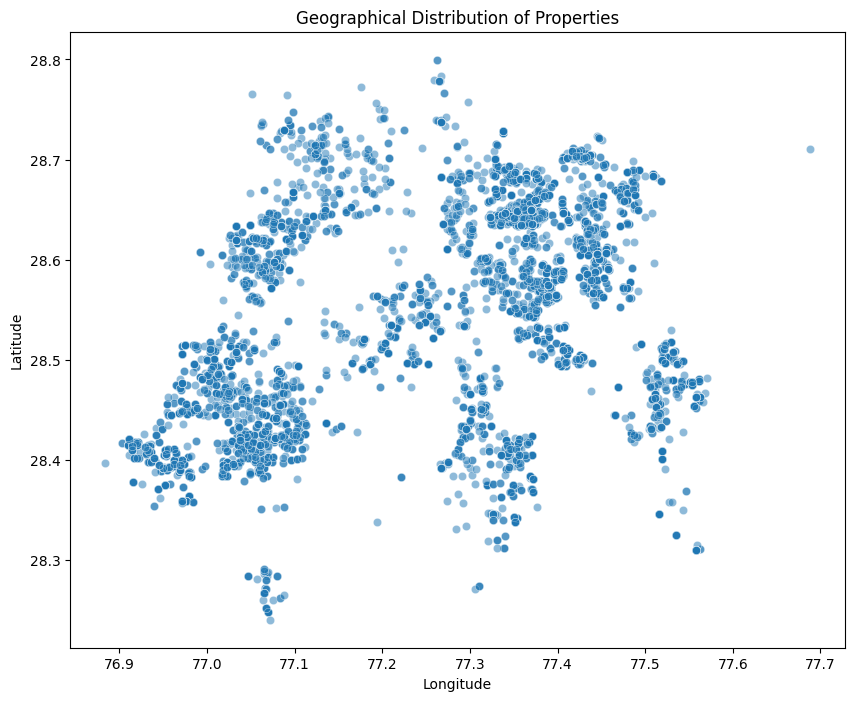

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, alpha=0.5)
plt.title('Geographical Distribution of Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

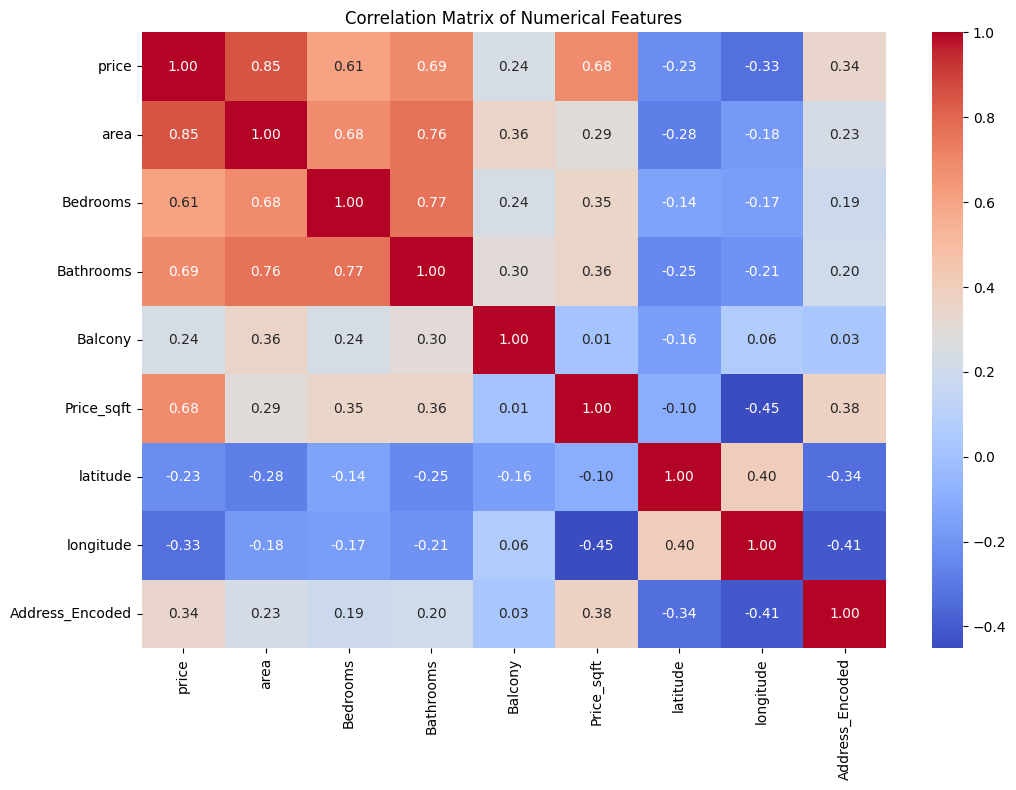

In [ ]:
numerical_cols = ['price', 'area', 'Bedrooms', 'Bathrooms', 'Balcony', 'Price_sqft', 'latitude', 'longitude', 'Address_Encoded']

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

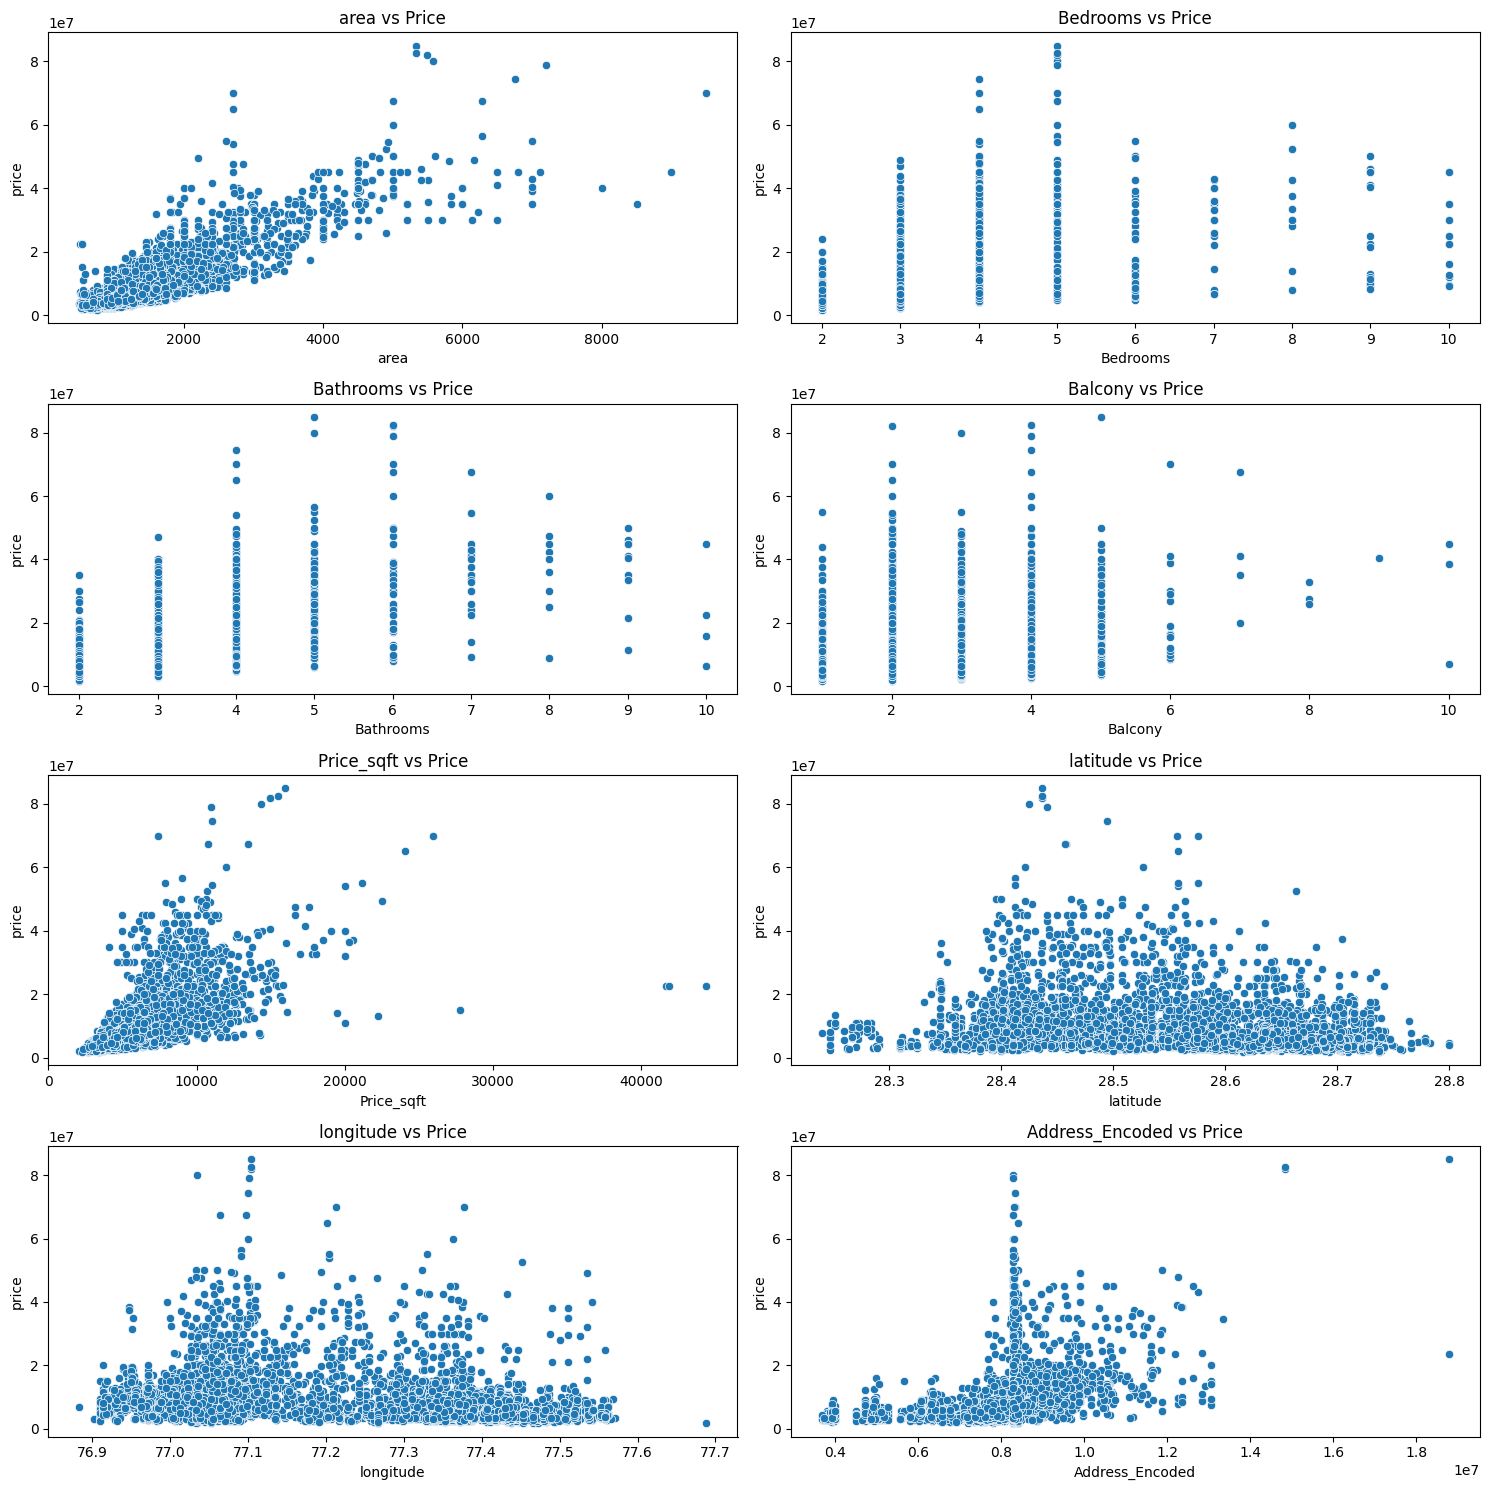

In [ ]:
# Scatter plots for numerical features vs. price
numerical_features = ['area', 'Bedrooms', 'Bathrooms', 'Balcony', 'Price_sqft', 'latitude', 'longitude', 'Address_Encoded']
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()


Mean = 8320634.531 rs

Applying Random Forest Reggression.

In [ ]:
from sklearn.model_selection import train_test_split, RepeatedKFold, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
import joblib

In [ ]:
for col in ["area", "Price_sqft"]:
    if col in df.columns:
        df[col] = np.clip(df[col], None, df[col].quantile(0.99))

In [ ]:
target = "price"
cat_cols = ["neworold", "Furnished_status", "Lift", "type_of_building"]
num_cols = ["area","Bedrooms","Bathrooms","Balcony","Price_sqft","latitude","longitude","Address_Encoded"]
features = [c for c in num_cols + cat_cols if c in df.columns]

X = df[features].copy()
y = df[target].astype(float).copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
pre = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
         [c for c in cat_cols if c in X.columns]),
        ("num", "passthrough", [c for c in num_cols if c in X.columns]),
    ],
    remainder="drop"
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,     # Use all available CPU cores
    bootstrap=True
)

pipe = Pipeline([("pre", pre), ("rf", rf)])

In [ ]:

param_dist = {
    "rf__n_estimators": randint(400, 1200),
    "rf__max_depth": [12, 16, 20, 24],
    "rf__max_features": ["sqrt", 0.5],
    "rf__min_samples_split": randint(3, 10),
    "rf__min_samples_leaf": randint(1, 5),
    "rf__bootstrap": [True],
}

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

rs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    verbose=1,
    random_state=42
)
rs.fit(X_train, y_train)
best = rs.best_estimator_
print("Best params:", rs.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best params: {'rf__bootstrap': True, 'rf__max_depth': 16, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 1171}


Train -> MAE: 120,675 | RMSE: 577,519 | R²: 0.9934
Test -> MAE: 257,415 | RMSE: 1,126,395 | R²: 0.9786


/tmp/ipython-input-2501128182.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values[:15], y=fi.index[:15], palette="viridis")


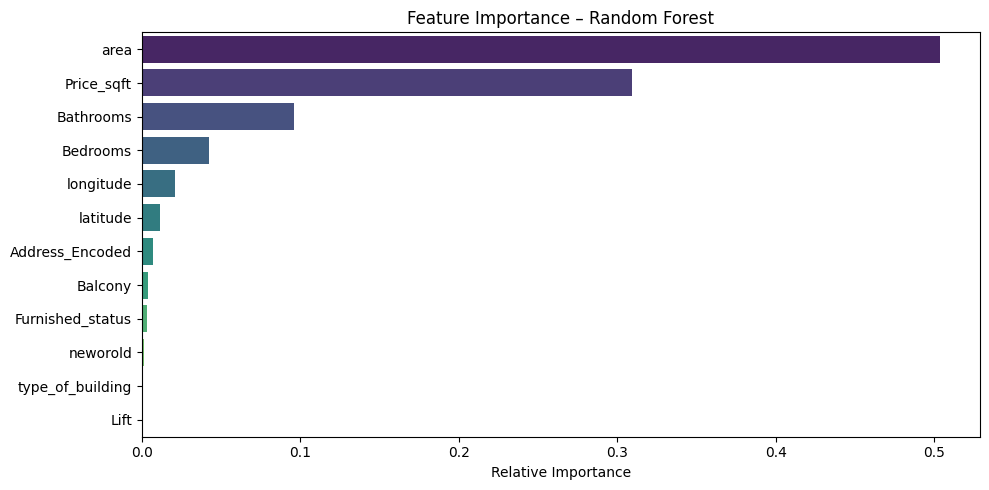

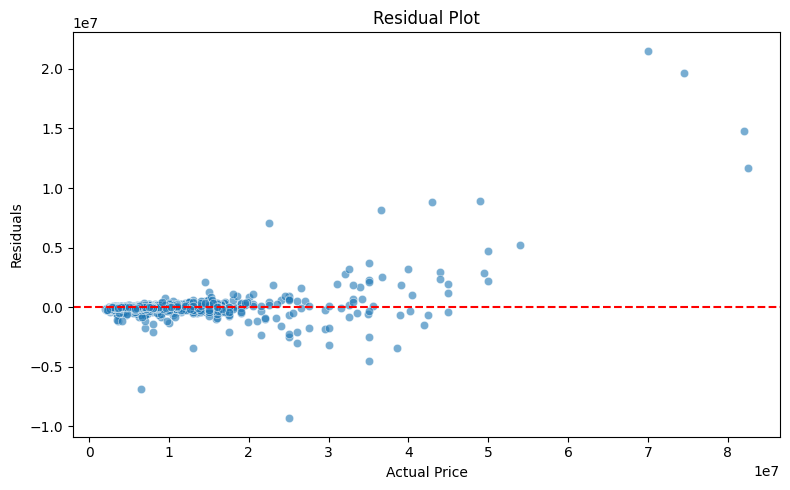

Saved: rf_price_pipeline_sklearn.joblib


In [ ]:
# Evaluation
y_pred_tr = best.predict(X_train)
y_pred_te = best.predict(X_test)

def report(split, yt, yp):
    mae = mean_absolute_error(yt, yp)
    mse = mean_squared_error(yt, yp)
    rmse = np.sqrt(mse)
    r2 = r2_score(yt, yp)
    print(f"{split} -> MAE: {mae:,.0f} | RMSE: {rmse:,.0f} | R²: {r2:.4f}")

report("Train", y_train, y_pred_tr)
report("Test",  y_test,  y_pred_te)

# Feature importance (from cuML RF)
importances = best.named_steps["rf"].feature_importances_
feat_names = (
    list(best.named_steps["pre"].transformers_[0][2]) +
    list(best.named_steps["pre"].transformers_[1][2])
)
fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=fi.values[:15], y=fi.index[:15], palette="viridis")
plt.title("Feature Importance – Random Forest")
plt.xlabel("Relative Importance"); plt.ylabel("")
plt.tight_layout(); plt.show()

# Residual diagnostics
residuals = y_test - y_pred_te
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot"); plt.xlabel("Actual Price"); plt.ylabel("Residuals")
plt.tight_layout(); plt.show()

# Save full pipeline
joblib.dump(best, "rf_price_pipeline_sklearn.joblib")
print("Saved: rf_price_pipeline_sklearn.joblib")

## Machine Learning Steps

You have performed the following steps for machine learning:

1.  **Data Loading and initial exploration:** Loaded the dataset and performed initial checks on the data structure, non-null values, and descriptive statistics.
2.  **Target Variable Identification:** Identified 'price' as the target variable for prediction.
3.  **Data Cleaning and Preprocessing:**
    *   Handled the 'Lift' column by converting values >= 1 to 1 and filling missing values with the mode.
    *   Dropped irrelevant columns like 'Unnamed: 0', 'desc', and 'Landmarks'.
    *   Dropped the 'Status' column due to potential bias.
    *   Filled missing values in the 'Balcony' column with the mode.
    *   Dropped the 'parking' column due to inconsistent data.
    *   Filled missing values in 'Furnished_status' with 'no data'.
    *   Applied out-of-fold target encoding to the 'Address' column to handle high cardinality, creating a new 'Address_Encoded' column and dropping the original 'Address' column.
    *   Clipped outliers in numerical columns ('area', 'Price\_sqft') at the 99th percentile.
4.  **Outlier Detection and Handling:** Visualized outliers using box plots and applied the IQR method to remove outliers from numerical columns, resulting in a cleaned dataset `df_cleaned`.
5.  **Exploratory Data Analysis (EDA):**
    *   Visualized the geographical distribution of properties using a scatter plot of latitude and longitude.
    *   Generated a correlation matrix to understand the relationships between numerical features.
    *   Created scatter plots to visualize the relationships between individual numerical features and the target variable 'price'.
6.  **Model Preparation:**
    *   Defined the target variable, categorical features, and numerical features.
    *   Split the data into training and testing sets.
    *   Created a preprocessing pipeline using `ColumnTransformer` to apply Ordinal Encoding to categorical features and pass through numerical features.
7.  **Model Selection and Training:**
    *   Initialized a `RandomForestRegressor` model.
    *   Created a `Pipeline` that includes the preprocessing steps and the Random Forest Regressor.
8.  **Hyperparameter Tuning:**
    *   Defined a hyperparameter distribution for the Random Forest Regressor.
    *   Used `RandomizedSearchCV` with `RepeatedKFold` cross-validation to find the best hyperparameters for the model based on the negative root mean squared error.(used it cuz suited best since its very small data set and also it takes less time 30 min).
    *   Trained the model with the best found hyperparameters.
9.  **Model Evaluation:**
    *   Evaluated the model's performance on both the training and testing sets using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).
    *   Visualized feature importances from the trained Random Forest model.
    *   Plotted residuals to diagnose the model's performance.
10. **Model Saving:** Saved the trained pipeline using `joblib`.

This process has prepared the data, trained a Random Forest Regression model, and evaluated its performance for predicting house prices in Delhi.